# `scipy.spatial` 

scipy.spatial can compute triangulations, Voronoi diagrams, and convex hulls of a set of points, by leveraging the `Qhull` library.

Moreover, it contains `KDTree` implementations for nearest-neighbor point queries, and utilities for distance computations in various metrics.

## Triangulations (qhull)

In [12]:
%matplotlib inline

import numpy as np
from scipy.spatial import Delaunay, ConvexHull, Voronoi
import matplotlib.pyplot as plt


points = np.random.rand(30, 2)   # 30 random points in 2-D

tri = Delaunay(points)
hull = ConvexHull(points)
voronoi = Voronoi(points)

In [13]:
print ("Neighbour triangles\n",tri.neighbors[0:5])
print ("Simplices\n", tri.simplices[0:5])
print ("Points\n", points[tri.simplices[0:5]])

Neighbour triangles
 [[22 -1  3]
 [-1  5 10]
 [ 3 -1  4]
 [ 0  2 30]
 [-1 14  2]]
Simplices
 [[ 5 12  2]
 [17 15  4]
 [20  7  5]
 [ 7 12  5]
 [ 7 20 24]]
Points
 [[[0.79187063 0.05714278]
  [0.68574951 0.10665533]
  [0.06074836 0.05337734]]

 [[0.08289224 0.8216753 ]
  [0.07545509 0.9931989 ]
  [0.02879815 0.50792461]]

 [[0.89602371 0.10820997]
  [0.91139528 0.17965344]
  [0.79187063 0.05714278]]

 [[0.91139528 0.17965344]
  [0.68574951 0.10665533]
  [0.79187063 0.05714278]]

 [[0.91139528 0.17965344]
  [0.89602371 0.10820997]
  [0.99833249 0.25695562]]]


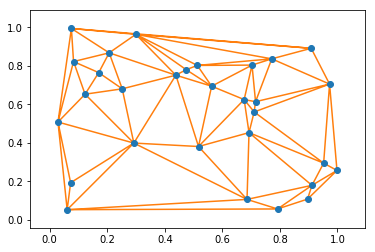

In [14]:
from scipy.spatial import delaunay_plot_2d
delaunay_plot_2d(tri)
pass

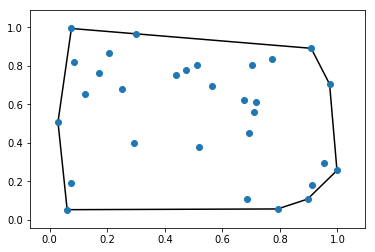

In [15]:
from scipy.spatial import convex_hull_plot_2d

convex_hull_plot_2d(hull)
pass

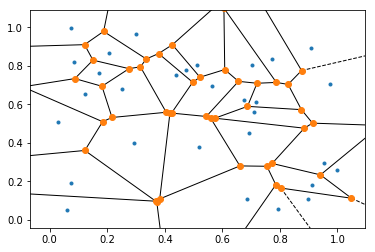

In [16]:
from scipy.spatial import voronoi_plot_2d

voronoi_plot_2d(voronoi)
pass

## KDtree

Allows very fast point to point searches.

In [17]:
from scipy.spatial import KDTree, cKDTree

In [18]:
tree = cKDTree(points)

print (tree.data)

[[0.51303423 0.80155943]
 [0.25205905 0.68018911]
 [0.06074836 0.05337734]
 [0.71054163 0.56026873]
 [0.02879815 0.50792461]
 [0.79187063 0.05714278]
 [0.12295969 0.65232538]
 [0.91139528 0.17965344]
 [0.70312061 0.80326417]
 [0.29929976 0.96277032]
 [0.20669551 0.86683944]
 [0.29239878 0.39889865]
 [0.68574951 0.10665533]
 [0.97263838 0.70471467]
 [0.07275193 0.19316306]
 [0.07545509 0.9931989 ]
 [0.69264163 0.45302748]
 [0.08289224 0.8216753 ]
 [0.17042656 0.76413752]
 [0.51715281 0.38099359]
 [0.89602371 0.10820997]
 [0.77181122 0.83575157]
 [0.43844756 0.75099743]
 [0.47428749 0.77953928]
 [0.99833249 0.25695562]
 [0.90871507 0.89038511]
 [0.95198967 0.29473868]
 [0.71536687 0.6134935 ]
 [0.67577301 0.62445799]
 [0.56278052 0.69383184]]


In [19]:
%%timeit

tree.query((0.5,0.5))

36.5 µs ± 526 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [20]:
test_points = np.random.rand(1000, 2)   # 1000 random points in 2-D

In [21]:
%%timeit

tree.query(test_points) 

794 µs ± 16.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [22]:
more_points = np.random.rand(10000, 2)   # 1000 random points in 2-D

big_tree = KDTree(more_points)

In [23]:
%%timeit

KDTree(more_points)

34.9 ms ± 730 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
%%timeit

big_tree.query(test_points) 

147 ms ± 1.91 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Compare this to the brute-force version


At what point does it make sense to use kdTree and not brute-force distance tests ?

The brute force method takes a fixed time per sample point and a fixed cost associated with the N-neighbour distance computation (but this can be vectorised efficiently). 


In [25]:
# Brute force version

def brute_force_distance(pts, spt):

    d = pts - spt
    d2 = d**2
    distances2 = np.einsum('ij->i',d2)
    
    nearest = np.argsort(distances2)[0]
    
    return np.sqrt(distances2[nearest]), nearest

# print np.einsum('ij->i',distances2)

In [27]:
print (brute_force_distance(more_points, (0.0,0.0)))
print (big_tree.query((0.0,0.0)))

(0.005268808419135541, 1009)
(0.005268808419135541, 1009)


In [28]:
%%timeit

brute_force_distance(points, (0.5,0.5))
brute_force_distance(points, (0.0,0.0))
brute_force_distance(points, (0.25,0.25))

39.7 µs ± 314 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [29]:
%%timeit

tree.query(np.array([(0.5,0.5), (0.0,0.0), (0.25,0.25)]))

35 µs ± 561 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [30]:
%%timeit

brute_force_distance(more_points, (0.5,0.5))
# brute_force_distance(more_points, (0.0,0.0))
# brute_force_distance(more_points, (0.25,0.25))


785 µs ± 17.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [31]:
%%timeit

big_tree.query(np.array([(0.5,0.5), (0.0,0.0), (0.25,0.25)]))

793 µs ± 18.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
